## <div style="padding: 50px;color:white;margin:10;font-size:80%;text-align:left;display:fill;border-radius:10px;background-color:#323232;overflow:hidden"><b><span style='color:#F1A424'>(2/8) |</span></b> Решающие деревья</div>

<div style="color:white;display:fill;border-radius:8px;font-size:100%; letter-spacing:1.0px;"><p style="padding: 5px;color:white;text-align:left;"><b><span style='color:#F1A424'>В ЧЕМ ОТЛИЧИЕ ОТ ЛИНЕЙНЫХ МОДЕЛЕЙ</span></b></p></div>

- `Линейные` модели быстро учатся (матричные или градиентный спуск)
- `Линейные` модели могу востанавливать только простые зависимости (из-за ограниченного количество параметров)
- `Линейные` модели можно использовать для восстановлния нелинейных зависимостей за счет перехода к спрямляющему пространству 
- `Линейные` модели не отображают особенности процесса принятия решения у людей (человек будет задавать ряд вопросов)

<div style="color:white;display:fill;border-radius:8px;font-size:100%; letter-spacing:1.0px;"><p style="padding: 5px;color:white;text-align:left;"><b><span style='color:#F1A424'>КАК СТРОИТСЯ ДЕРЕВЬЕ РЕШЕНИЙ</span></b></p></div>

Пример построения деревьев:

```python
function decision_tree(X, y):
    if stopping_criterion(X, y) == True:
        S = create_leaf_with_prediction(y)
    else:
        S = create_node()
        (X_1, y_1) .. (X_L, y_L) = best_split(X, y)
        for i in 1..L:
            C = decision_tree(X_i, y_i)
            connect_nodes(S, C)
    return S
```

У нас есть исходная выборка `X0` и ответы `y0`

- При каждом новом вызове функции, проверяем `критерии остановки` (stopping_criterion) для текущей **подвыпорки** (Xx,yx)
- Если критерии выполняются, функция возвращает новый `лист` дерева с предсказанием (create_leaf_with_prediction), на основе правильных ответов y, все объекты попав в этот лист будут иметь это предсказание
- В ином случае, стоится `внутренная вершина` в которой будет определено правило разделения (объекты попадут в одну из ветвей). Наилучшее разбиение (best_split) может определятся с помощью мер неопределенности (impurity measures)
- Подвыборки (Xx,yx), (Xk,yk) подаются на вход следующиим вызован этой рекурсивной функции

### <b>Задание <span style='color:#F1A424'>5.2.2</span></b> 

По графику выше определите, какова `максимальная глубина` этого решающего дерева? (Это сбалансированное дерево, т.е. все его ветви одинаковой глубины)

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

RANDOM_SEED = 139

train_data, train_labels = make_blobs(n_samples=200, 
                                      centers=[(0,1),(-3,-3),(4,2)], 
                                      n_features=2, 
                                      random_state=RANDOM_SEED,
                                      cluster_std=(1.2,1.5,1,))

# для визуализации
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), 
                       np.arange(y_min, y_max, 0.01))

# модель 
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, 
                                  random_state=RANDOM_SEED)

In [2]:
# training the tree
clf_tree.fit(train_data, train_labels)

# some code to depict separating surface
xx, yy = get_grid(train_data)

# np.c_ - add along 2nd axis (columns)
# np.r_ - add along 1st axis (rows)

grid_data = np.c_[xx.flatten(),yy.flatten()]
print(grid_data.shape)

# предсказываем 
predicted = clf_tree.predict(grid_data).reshape(xx.shape)
print(predicted.shape)

(2156197, 2)
(1427, 1511)


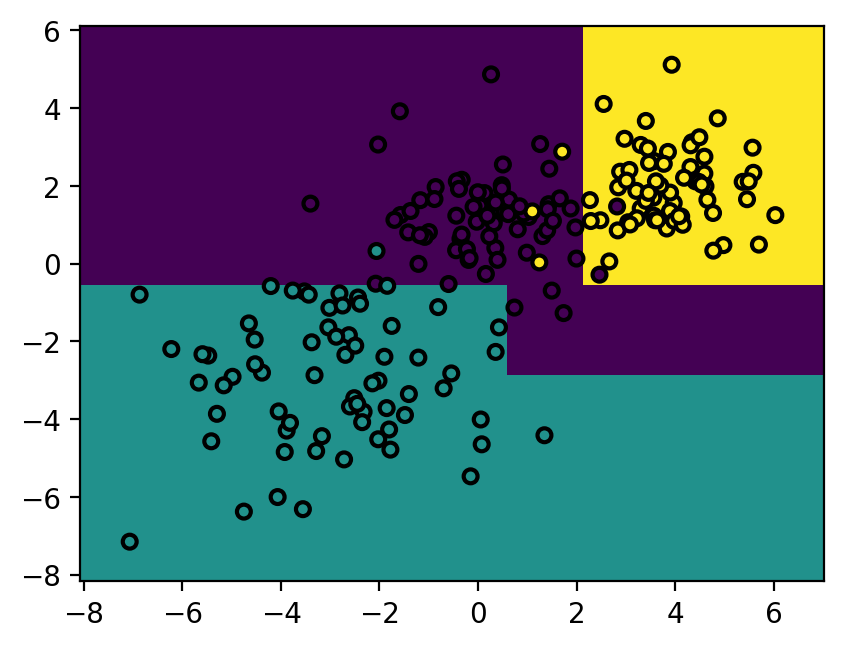

In [3]:
plt.pcolormesh(xx, yy, predicted, cmap='viridis')
plt.scatter(train_data[:, 0], train_data[:, 1], 
            c=train_labels, s=25, 
            cmap='viridis', 
            edgecolors='black', linewidth=1.5);

плоскость делят **4 прямые**, следовательно есть 4 разделения выборки надвое, для такого количества разделений дерево должно быть как минимум глубины 3

<div style="color:white;display:fill;border-radius:8px;font-size:100%; letter-spacing:1.0px;"><p style="padding: 5px;color:white;text-align:left;"><b><span style='color:#F1A424'>ПЕРЕОБУЧЕНИЕ
   </span></b></p></div>
   
- Решающее дерево вполне может **переобучиться**: его можно сделать настолько глубоким, что каждый лист решающего дерева будет соответствовать ровно одному объекту обучающей выборки `max_depth=None`
- В этом случае, если записать в каждом листе ответ соответствующего объекта, на **обучающей выборке получается нулевая ошибка** 
- Дерево получается явно переобученным

model depth: 10

confusion matrix:
[[167   0   0]
 [  0 167   0]
 [  0   0 166]]


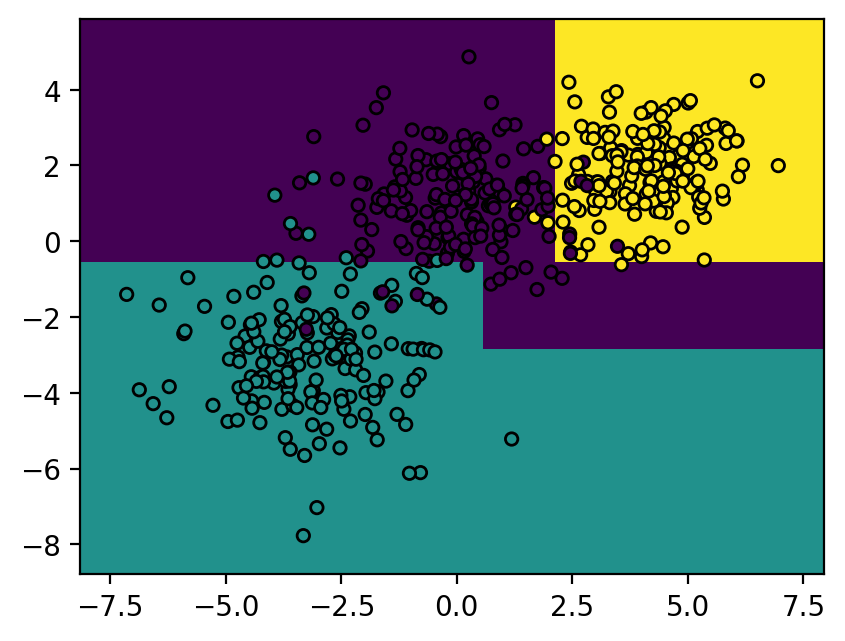

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix as cm
%matplotlib inline

RANDOM_SEED = 139

# Make training data
train_data, train_labels = make_blobs(n_samples=500, 
                                      centers=[(0,1),(-3,-3),(4,2)], 
                                      n_features=2, 
                                      random_state=RANDOM_SEED,
                                      cluster_std=(1.2,1.5,1,))

# Let’s write an auxiliary function that will return grid for further visualization.
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), 
                       np.arange(y_min, y_max, 0.01))

# Decision Tree Model
model = DecisionTreeClassifier(criterion='entropy', 
                                  max_depth=None, 
                                  random_state=RANDOM_SEED)

# training the tree
model.fit(train_data, train_labels)
y_pred = model.predict(train_data)
print(f'model depth: {model.tree_.max_depth}')

# some codee to depict separating surface
xx, yy = get_grid(train_data)

# predict on grid
predicted = clf_tree.predict(np.c_[xx.flatten(), 
                                   yy.flatten()])
predicted_grid = predicted.reshape(xx.shape)

# max depth results in zero error on training set
print('\nconfusion matrix:')
print(cm(y_pred,train_labels))

# plot prediction on grid
plt.pcolormesh(xx, yy, predicted_grid)

# plot true results
plt.scatter(train_data[:, 0],
            train_data[:, 1], 
            c=train_labels, 
            s=20, 
            edgecolors='black', 
            linewidth=1)

<div style="color:white;display:fill;border-radius:8px;font-size:100%; letter-spacing:1.0px;"><p style="padding: 5px;color:white;text-align:left;"><b><span style='color:#F1A424'>РЕШАЮШИЕ ДЕРЕВЬЯ ДЛЯ РЕГРЕСИИ
   </span></b></p></div>
   
Мы можем использовать депевье решении для задачи регресии

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set(style='whitegrid')

RANDOM_SEED = 139

n_train = 150        
n_test = 1000       
noise = 0.1

def f(x):
    x = x.ravel()
    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 5) ** 2)

def generate(n_samples, noise):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X).ravel()
    y = np.exp(-X ** 2) + 1.5 * np.exp(-(X - 5) ** 2) + \
    np.random.normal(0.0, noise, n_samples)
    X = X.reshape((n_samples, 1))
    return X, y

X_train, y_train = generate(n_samples=n_train, noise=noise)
X_test, y_test = generate(n_samples=n_test, noise=noise)
print(X_train.shape,X_test.shape)

(150, 1) (1000, 1)


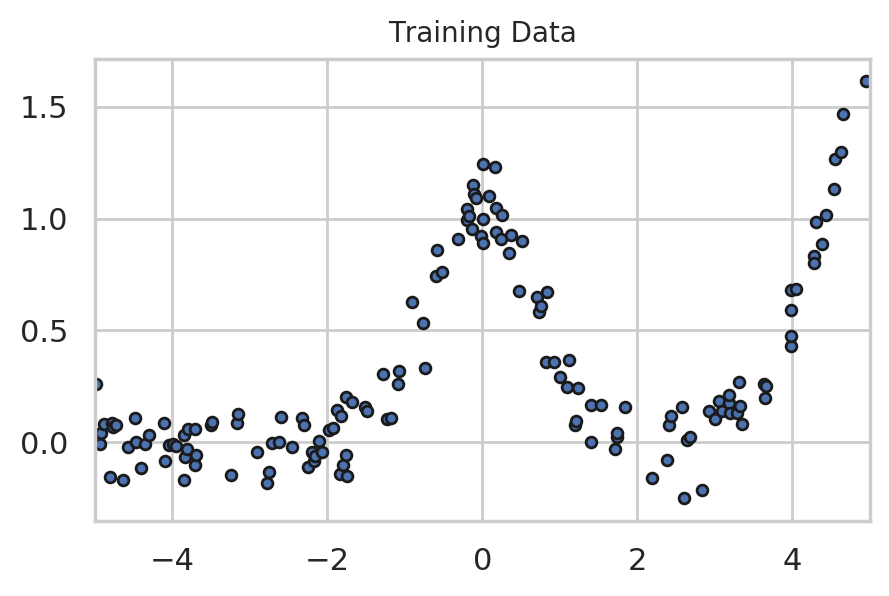

In [6]:

plt.rcParams['figure.figsize'] = 5, 3
plt.figure()
plt.scatter(X_train, y_train, c="b", s=15,edgecolors='k')
plt.xlim([-5, 5])
plt.title("Training Data",size=10)
plt.show()

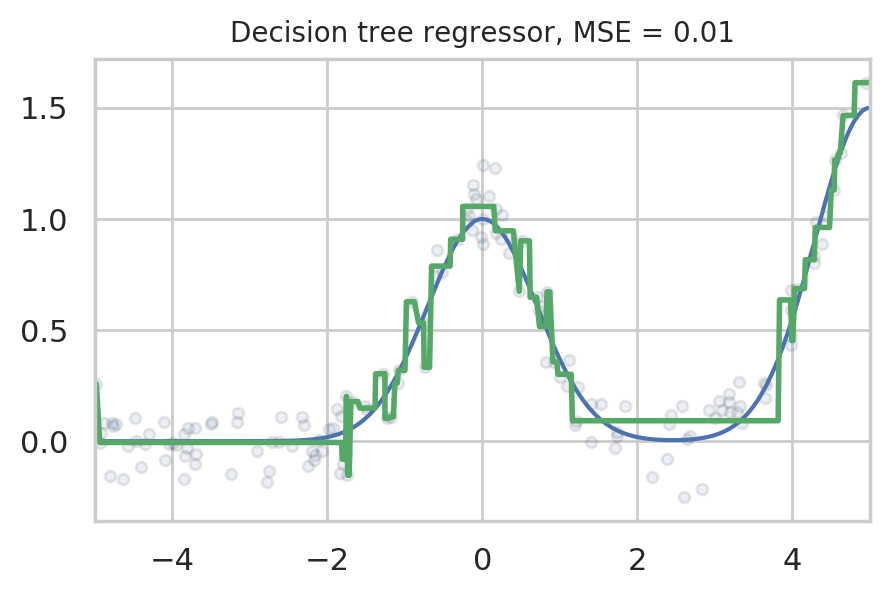

In [7]:
from sklearn.tree import DecisionTreeRegressor as DTR

model = DTR(max_depth=6,random_state=RANDOM_SEED)
model.fit(X_train, y_train)
ym_train = model.predict(X_train)
ym_test = model.predict(X_test)

plt.figure()
plt.plot(X_test, f(X_test), "b")
plt.scatter(X_train, y_train, c="b", s=15,edgecolors='k',alpha=0.1)
plt.plot(X_test, ym_test, "g", lw=2)
plt.xlim([-5, 5])
plt.title("Decision tree regressor, MSE = %.2f" % np.mean((y_train - ym_train) ** 2),size=10)
plt.show()

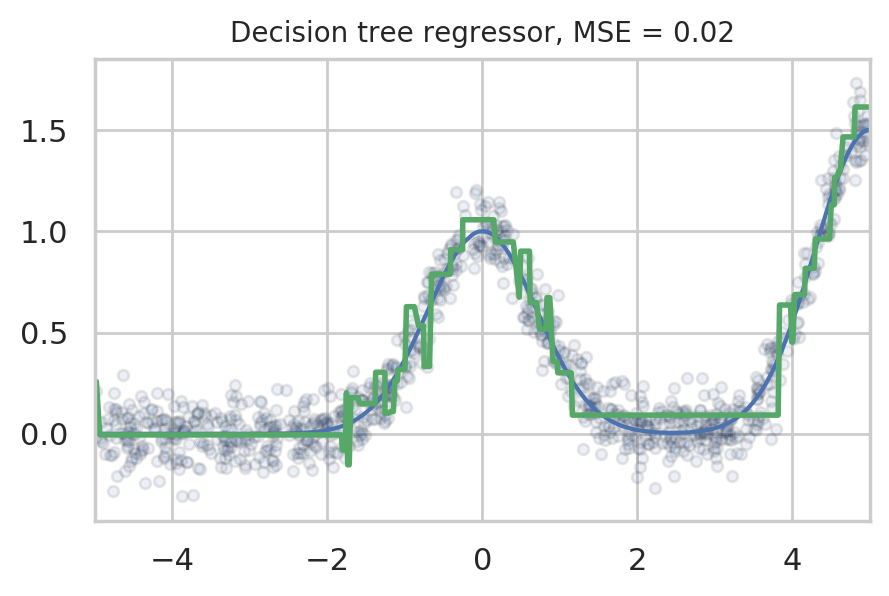

In [8]:
plt.figure()
plt.plot(X_test, f(X_test), "b")
plt.plot(X_test, ym_test, "g", lw=2)
plt.scatter(X_test, y_test, c="b", s=15,edgecolors='k',alpha=0.1)
plt.xlim([-5, 5])
plt.title("Decision tree regressor, MSE = %.2f" % np.mean((y_test - ym_test) ** 2),size=10)
plt.show()